# Example for the concept of LGU

This notebook shows how tessellation and its functionalities can help to create Local Geographic Units. Local Geographic Units are the combination of spatial discretization with additional information assigned to each tile. This conecept makes further analysis easy. 

In [1]:
import tesspy as tp
from tesspy import Tessellation
import matplotlib.pyplot as plt
from tesspy.tessellation import count_poi_per_tile
import numpy as np
import contextily as ctx

import warnings
warnings.filterwarnings('ignore')

## Tessellation

First, we define a tessellation area. In the case <b>Frankfurt am Main</b> and <b>Nairobi</b> are chosen as case study.
A regular tessellation method, i.e., hexagons, and an irregular method, i.e., city blocks, are used.

In [2]:
ffm = Tessellation("Frankfurt am Main")
africa = Tessellation("Nairobi")

In [3]:
africa_hex = africa.hexagons(resolution=9)

In [4]:
ffm_cb = ffm.city_blocks(n_polygons=1000)

MultiPolygon found. Splitting it up...


## Creating LGU datasets

Using the function `count_poi_per_tile`, an LGU dataset is created based on the tessellation and additional information (POI). 

In [5]:
gdf_africa_hex = count_poi_per_tile("Nairobi", africa_hex, poi_categories=["amenity","building"])
gdf_ffm_cb = count_poi_per_tile("Frankfurt", ffm_cb, poi_categories=["amenity","leisure", "office"])

In [7]:
gdf_ffm_cb

,cityblock_id,geometry,amenity,leisure,office
0,cityblockID0,"POLYGON ((8.68230 50.10893, 8.68232 50.10887, ...",74.0,1.0,2.0
1,cityblockID1,"POLYGON ((8.67928 50.10815, 8.67876 50.10797, ...",60.0,1.0,1.0
2,cityblockID2,"POLYGON ((8.68671 50.11190, 8.68670 50.11194, ...",175.0,3.0,7.0
3,cityblockID3,"POLYGON ((8.69298 50.11307, 8.69298 50.11309, ...",95.0,10.0,4.0
4,cityblockID4,"POLYGON ((8.68545 50.10926, 8.68522 50.10925, ...",40.0,1.0,0.0
...,...,...,...,...,...
1383,cityblockID1383,"POLYGON ((8.59033 50.03088, 8.59031 50.03080, ...",0.0,0.0,0.0
1384,cityblockID1384,"POLYGON ((8.60164 50.04618, 8.60279 50.04852, ...",2.0,0.0,0.0
1385,cityblockID1385,"POLYGON ((8.60788 50.04855, 8.60787 50.04857, ...",0.0,0.0,0.0
1386,cityblockID1386,"POLYGON ((8.58302 50.02316, 8.58270 50.02307, ...",3.0,0.0,1.0


In [11]:
gdf_africa_hex

,hex_id,geometry,amenity,building
0,897a6e54c37ffff,"POLYGON ((36.72584 -1.36099, 36.72588 -1.35910...",3.0,64.0
1,897a6e47117ffff,"POLYGON ((36.73657 -1.24548, 36.73661 -1.24360...",0.0,0.0
2,897a6e5a343ffff,"POLYGON ((37.03414 -1.27108, 37.03418 -1.26920...",0.0,0.0
3,897a6e5505bffff,"POLYGON ((36.83938 -1.32114, 36.83942 -1.31926...",11.0,65.0
4,897a6e5408bffff,"POLYGON ((36.78535 -1.36950, 36.78539 -1.36761...",0.0,0.0
...,...,...,...,...
6328,897a6e50817ffff,"POLYGON ((36.88515 -1.35163, 36.88519 -1.34974...",0.0,0.0
6329,897a6e54c6fffff,"POLYGON ((36.73271 -1.34999, 36.73275 -1.34811...",0.0,45.0
6330,897a6e51153ffff,"POLYGON ((36.97667 -1.33054, 36.97671 -1.32866...",0.0,0.0
6331,897a6e40387ffff,"POLYGON ((36.85312 -1.21716, 36.85316 -1.21527...",0.0,33.0


In [12]:
gdf_africa_hex["overall_count"]=gdf_africa_hex.iloc[:,-2:].sum(axis=1)
gdf_ffm_cb["overall_count"]=gdf_ffm_cb.iloc[:,-3:].sum(axis=1)

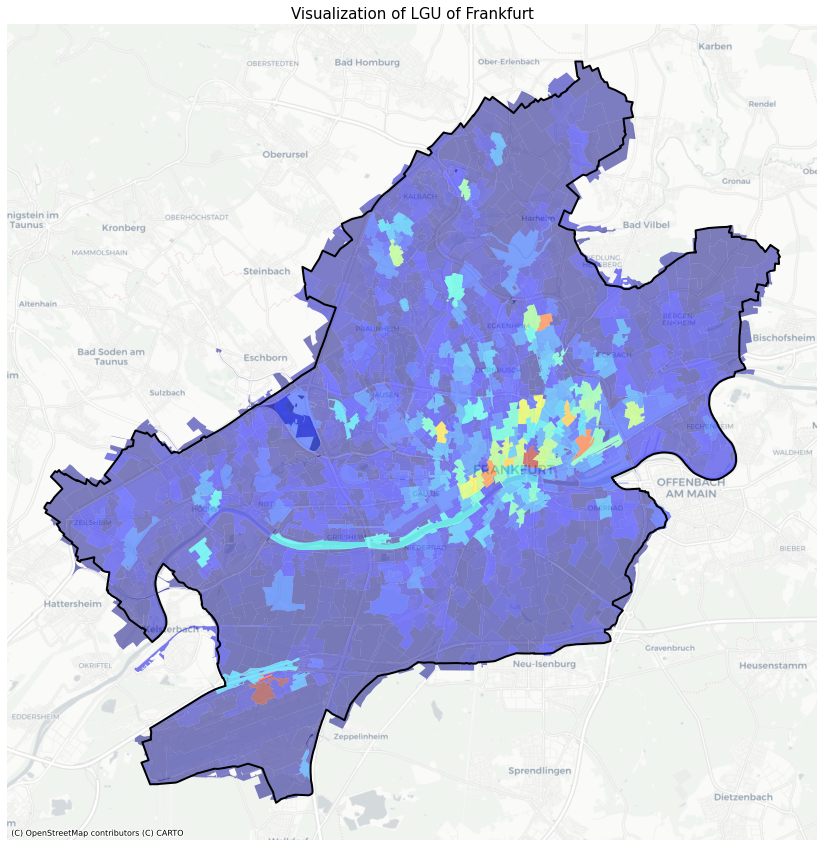

In [14]:
fig, axs = plt.subplots(figsize=(15,15))

ffm.get_polygon().to_crs('EPSG:3857').boundary.plot(ax=axs, linewidth=2, color='black')
gdf_ffm_cb.to_crs('EPSG:3857').plot(column='overall_count',cmap='jet', ax=axs,alpha=0.5)
ctx.add_basemap(ax=axs, source=ctx.providers.CartoDB.Positron, crs='EPSG:3857')


axs.axis('off')
axs.set_title(f"Visualization of LGU of Frankfurt", fontsize=15)

plt.show()

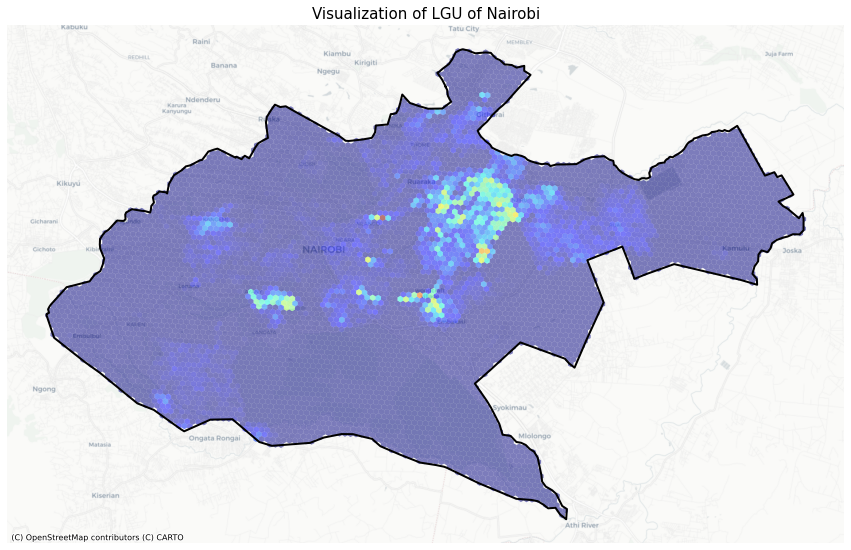

In [22]:
fig, axs = plt.subplots(figsize=(15,15))

africa.get_polygon().to_crs('EPSG:3857').boundary.plot(ax=axs, linewidth=2, color='black')
gdf_africa_hex.to_crs('EPSG:3857').plot(column='overall_count',cmap='jet', ax=axs,alpha=0.5)
ctx.add_basemap(ax=axs, source=ctx.providers.CartoDB.Positron, crs='EPSG:3857')


axs.axis('off')
axs.set_title(f"Visualization of LGU of Nairobi", fontsize=15)

plt.show()